<a href="https://colab.research.google.com/github/MITXy/CoronaProject/blob/main/ClassificationModels/Logistic_Regression(Classification)_and_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For running pandas_profiling
! pip install pandas==0.25.3
! pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

     |████████████████████████████████| 10.4 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.25.3 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.
     |████████████████████████████████| 17.3 MB 268 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
url = 'https://drive.google.com/file/d/1DmJA2zbp_GRhiXO8JWI0j1x30KN9WPdz/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
insurance = pd.read_csv(url)
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [4]:
insurance.shape

(400, 5)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [3]:
insurance["Purchased"] = insurance["Purchased"].apply(lambda x:1 if x== "purchased" else 0)

In [5]:
ProfileReport(insurance)

TypeError: ignored

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
insurance.drop(["User ID"], axis = "columns", inplace = True)

In [8]:
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


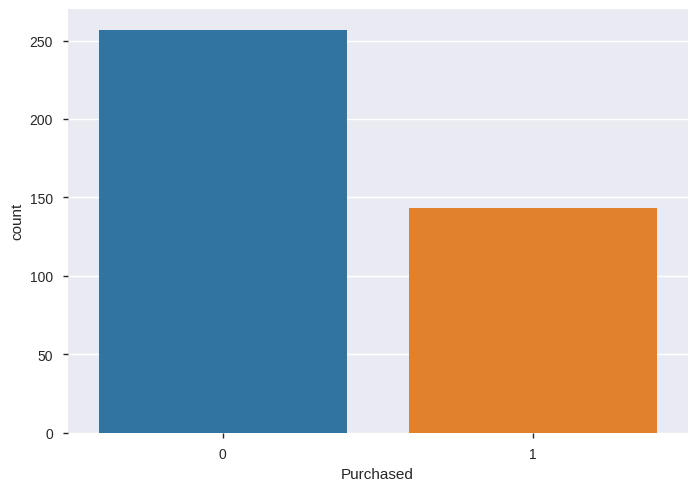

In [9]:
sns.countplot(x = "Purchased", data = insurance)

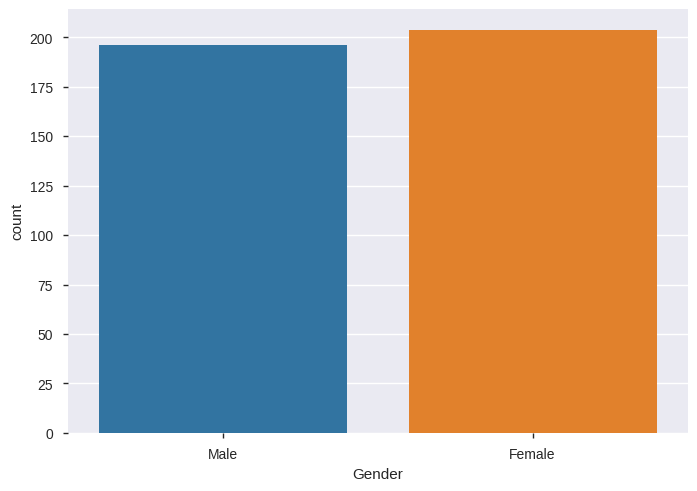

In [10]:
sns.countplot(x = "Gender", data = insurance)

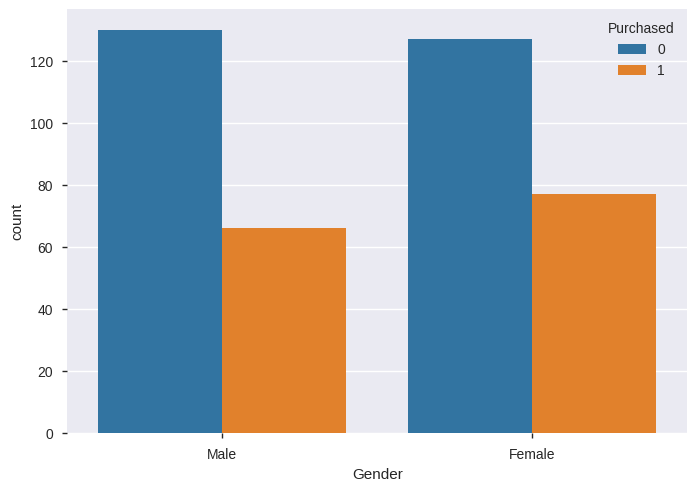

In [11]:
sns.countplot(x= "Gender", hue = "Purchased", data = insurance)

In [12]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
x = insurance.drop(["Purchased"], axis = "columns")
y = insurance["Purchased"] 

In [44]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [15]:
pd.get_dummies(insurance["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [17]:
x = pd.get_dummies(x)
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Gender_Female    400 non-null    uint8
 3   Gender_Male      400 non-null    uint8
dtypes: int64(2), uint8(2)
memory usage: 7.2 KB


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
prediction = model.predict(x_test)

In [22]:
metrics.accuracy_score(y_test, prediction)

0.6416666666666667

In [24]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

In [25]:
metrics.accuracy_score(y_test, prediction)

0.6416666666666667

In [26]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        77
           1       0.00      0.00      0.00        43

    accuracy                           0.64       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.41      0.64      0.50       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Making the model better
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
rf_prediction = randomforestmodel.predict(x_test)

In [29]:
metrics.accuracy_score(y_test, rf_prediction)

0.9166666666666666

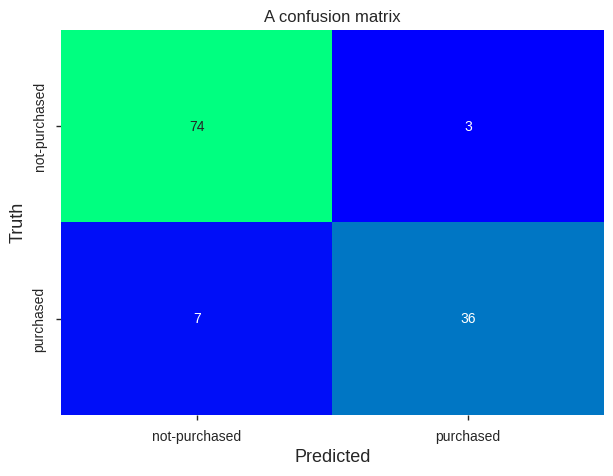

In [30]:
ConfusionMatrix(y_test, rf_prediction, label =['not-purchased','purchased'])

In [36]:
metrics.accuracy_score(y_test, rf_prediction)

from sklearn.metrics import f1_score
print(f1_score(y_test, rf_prediction))

0.878048780487805


In [39]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.92      0.84      0.88        43

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



In [40]:
print('Parameters currently in use:\n')
mod_details = randomforestmodel.get_params()
for i in mod_details:
  print(i," :", mod_details[i])

Parameters currently in use:

bootstrap  : True
ccp_alpha  : 0.0
class_weight  : None
criterion  : gini
max_depth  : None
max_features  : auto
max_leaf_nodes  : None
max_samples  : None
min_impurity_decrease  : 0.0
min_samples_leaf  : 1
min_samples_split  : 2
min_weight_fraction_leaf  : 0.0
n_estimators  : 100
n_jobs  : None
oob_score  : False
random_state  : None
verbose  : 0
warm_start  : False


In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in random_grid:
  print(i," :", random_grid[i])

n_estimators  : [20, 45, 71, 96, 122, 147, 173, 198, 224, 250]
max_features  : ['auto', 'sqrt']
max_depth  : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]
min_samples_split  : [2, 5, 10]
min_samples_leaf  : [1, 2, 4]
bootstrap  : [True, False]


In [44]:
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state= 7)
base_model.fit(x_train, y_train)
bm_predictions = base_model.predict(x_test)
base_accuracy = metrics.accuracy_score(y_test, bm_predictions)
print("Base model Accuracy:", base_accuracy)

best_random = rf_random.best_estimator_
best_random.fit(x_train, y_train)
best_predictions = best_random.predict(x_test)
best_accuracy = metrics.accuracy_score(y_test, best_predictions)
print("Best model Accuracy:", base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base model Accuracy: 0.9166666666666666


NameError: ignored